# Using OLS regression to estimate the impact of socio-economic factors on *Crime Rate* in Chicago

In the process of evaluating our models, we adhere to a standard statistical significance threshold of 5%.

In [31]:
import geopandas as gpd
import libpysal as  ps
import spreg
import warnings
warnings.filterwarnings('ignore')
from constants import PREPROCESSED_DATA_PATH

gdf = gpd.read_file(PREPROCESSED_DATA_PATH)

The code below creates a “Queen” contiguity weight matrix. In spatial analysis, a weight matrix defines the “neighbors” for each observation in the dataset. The “Queen” method considers two observations as neighbors if they share a common edge or a common vertex. Also, the normalization of the weight matrix using row-standardization is performed.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

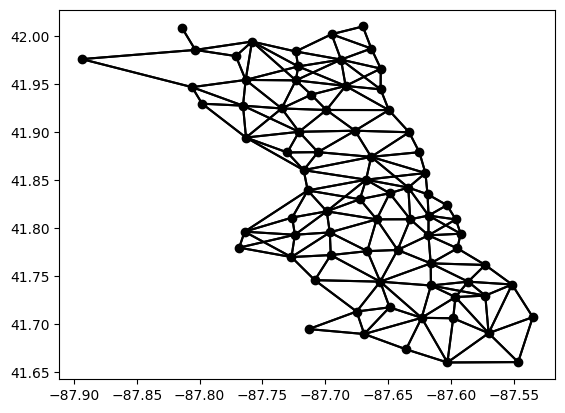

In [32]:
w = ps.weights.Queen.from_dataframe(gdf)
w.transform='r'

w.plot(gdf)

The `robust="white"` attribute is used in our model to make our error calculations more reliable. This method helps us deal with varying error sizes. The Ordinary Least Squares (OLS) utilizing the White Population Percent variable using `spreg.OLS` class:

In [33]:
Y_name = 'CRIME_RATE'
X_name = ['POP_DENSITY', 'LIQUOR_STORES_DENSITY', 'POP_BELOW_125_POVERTY_PCT', 'WHITE_POP_PCT', 'ASIAN_POP_PCT']

Y = gdf[Y_name].to_numpy()
X = gdf[X_name].to_numpy()

ols = spreg.OLS(Y, X,  w=w, name_y=Y_name, name_x=X_name, nonspat_diag=False, spat_diag=True, robust='white')

print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  CRIME_RATE                Number of Observations:          77
Mean dependent var  :     61.8206                Number of Variables   :           6
S.D. dependent var  :     39.4260                Degrees of Freedom    :          71
R-squared           :      0.8133
Adjusted R-squared  :      0.8001

White Standard Errors
------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     t-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        61.79674        10.10701         6.11425         0.00000
         POP_DENSITY        -0.00169         0.00072        -2.34077         0.02206
LIQUOR_STORES_DENSITY       126.62404 

OLS regression utilizing the Black Population Percent variable:

In [34]:
X_name = ['POP_DENSITY', 'LIQUOR_STORES_DENSITY', 'POP_BELOW_125_POVERTY_PCT', 'BLACK_POP_PCT', 'ASIAN_POP_PCT']

X = gdf[X_name].to_numpy()

ols = spreg.OLS(Y, X,  w=w, name_y=Y_name, name_x=X_name, nonspat_diag=False, spat_diag=True, robust='white')

print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  CRIME_RATE                Number of Observations:          77
Mean dependent var  :     61.8206                Number of Variables   :           6
S.D. dependent var  :     39.4260                Degrees of Freedom    :          71
R-squared           :      0.8205
Adjusted R-squared  :      0.8079

White Standard Errors
------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     t-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        -0.80699         5.38068        -0.14998         0.88121
         POP_DENSITY        -0.00121         0.00075        -1.60540         0.11284
LIQUOR_STORES_DENSITY       110.13119 

The regression model which includes *WHITE_POP_PCT* as independent variable, has an R-squared value of 0.8133. This suggests that approximately 81.33% of the variation in *CRIME_RATE* can be accounted for by the predictors in the model. The Adjusted R-squared value, however, is slightly lower at 0.8001, indicating that there might be some predictors in the model that do not contribute significantly to the explanation of *CRIME_RATE*. These R-squared and Adjusted R-squared values are similar to those when *BLACK_POP_PCT* is utilized, which are 0.8205 and 0.8079, respectively.

Among all the predictors, *POP_DENSITY*, *LIQUOR_STORES_DENSITY*, *POP_BELOW_125_POVERTY_PCT*, *WHITE_POP_PCT* and *BLACK_POP_PCT* were found to be statistically significant at the 5% level. The positive coefficients for POP_*DENSITY, *LIQUOR_STORES_DENSITY*, *POP_BELOW_125_POVERTY_PCT* and *BLACK_POP_PCT* suggest that an increase in the density of liquor stores, the percentage of the population below 125% of the poverty line, the percentage of the Black population, and the population density are all associated with an increase in the crime rate.

Interestingly, *WHITE_POP_PCT* was a significant predictor with a negative coefficient, indicating that an increase in the percentage of the White population was associated with a decrease in the crime rate.

The diagnostics for spatial dependence revealed significant spatial autocorrelation in the model. The Lagrange Multiplier tests for both lag and error dependence were significant, suggesting that the *CRIME_RATE* at one location might be influenced by values at neighboring locations.

Given these results, it would be beneficial to consider a different regression model that can account for spatial and error dependence, such as a Spatial Two Stage Least Squares Model, Spatial Lag Model, or a Spatial Error Model. This would help ensure that the spatial lag is taken into account correctly.